In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('df_balanced.csv')

In [3]:
df.head()

,content,score,sentiment
0,good,5,Positif
1,Sanagat memuaskan,5,Positif
2,Baik,4,Positif
3,Jos,5,Positif
4,Salam silaturahmi memperat pertemanan dan pers...,5,Positif


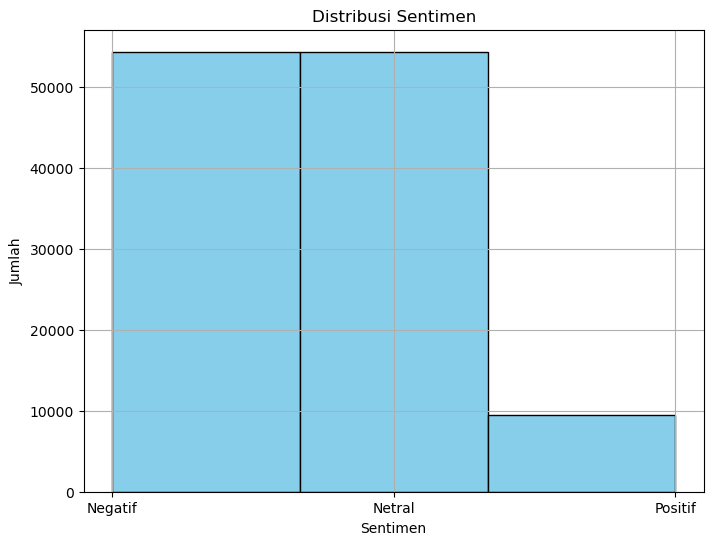

In [4]:
import matplotlib.pyplot as plt

# Visualisasi distribusi sentimen menggunakan histogram
plt.figure(figsize=(8, 6))
plt.hist(df['sentiment'], bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen')
plt.xticks(range(3), ['Negatif', 'Netral', 'Positif'])  # Ganti label sesuai dengan sentimen Anda
plt.grid(True)
plt.show()


In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [6]:
# Inisialisasi stemmer dan daftar stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('indonesian'))  # Menggunakan stopwords bahasa Indonesia, Anda dapat mengubahnya sesuai kebutuhan

In [7]:
# Lowercasing teks
df['content'] = df['content'].str.lower()

In [8]:
# Tokenisasi teks
df['tokenized_content'] = df['content'].apply(word_tokenize)

In [9]:
# Pembersihan teks dari tanda baca dan stopwords
df['tokenized_content'] = df['tokenized_content'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])
df['tokenized_content'] = df['tokenized_content'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

In [10]:
# Stemming teks
df['stemmed_content'] = df['tokenized_content'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

In [11]:
# Menggabungkan kembali token-token menjadi kalimat
df['preprocessed_content'] = df['stemmed_content'].apply(lambda tokens: ' '.join(tokens))

In [12]:
df

,content,score,sentiment,tokenized_content,stemmed_content,preprocessed_content
0,good,5,Positif,[good],[good],good
1,sanagat memuaskan,5,Positif,"[sanagat, memuaskan]","[sanagat, memuaskan]",sanagat memuaskan
2,baik,4,Positif,[],[],
3,jos,5,Positif,[jos],[jo],jo
4,salam silaturahmi memperat pertemanan dan pers...,5,Positif,"[salam, silaturahmi, memperat, pertemanan, per...","[salam, silaturahmi, memperat, pertemanan, per...",salam silaturahmi memperat pertemanan persudaraan
...,...,...,...,...,...,...
118282,ga ada gratis ongkirnya 🙂,3,Netral,"[ga, gratis, ongkirnya, 🙂]","[ga, grati, ongkirnya, 🙂]",ga grati ongkirnya 🙂
118283,lumayan meski msh ada bug nya,3,Netral,"[lumayan, msh, bug, nya]","[lumayan, msh, bug, nya]",lumayan msh bug nya
118284,game membutuhkan handphone dengan ram yg besar,3,Netral,"[game, membutuhkan, handphone, ram, yg]","[game, membutuhkan, handphon, ram, yg]",game membutuhkan handphon ram yg
118285,"hadehh, makin hari makin lag jaringannya, bene...",3,Netral,"[hadehh, lag, jaringannya, benerin, jaringanny...","[hadehh, lag, jaringannya, benerin, jaringanny...",hadehh lag jaringannya benerin jaringannya atu...


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Pisahkan fitur (X) dan target (y)
X = df['preprocessed_content']
y = df['sentiment']

In [15]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Ekstraksi fitur dengan CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # Sesuaikan jumlah fitur sesuai kebutuhan Anda
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [17]:
# Inisialisasi dan latih model Logistic Regression
model = LogisticRegression(max_iter=1000)  # Jika diperlukan, sesuaikan parameter max_iter
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [18]:
# Prediksi pada data uji
y_pred = model.predict(X_test_vectorized)

In [19]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 0.8319384563361231

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.82      0.88      0.85     10763
      Netral       0.28      0.03      0.05      1881
     Positif       0.85      0.92      0.89     11014

    accuracy                           0.83     23658
   macro avg       0.65      0.61      0.59     23658
weighted avg       0.79      0.83      0.80     23658



In [21]:
import pickle

# Simpan model ke dalam file pickle
with open('logistic_regression(1).pkl', 'wb') as f:
    pickle.dump(model, f)
